In [1]:
%%capture
%run Data_Cleaning.ipynb

# 3FF

In [2]:
merged_data.head(5)

,Period,RIC,Closing Price,SIC Industry Code,SIC Industry Name,Company Market Cap,Industry
0,2025-01-31,AAPL.O,236.00,3571.0,Electronic Computers,3.210436e+12,Hi-Tech
1,2024-12-31,AAPL.O,250.42,3571.0,Electronic Computers,3.210436e+12,Hi-Tech
2,2024-11-30,AAPL.O,237.33,3571.0,Electronic Computers,3.210436e+12,Hi-Tech
3,2024-10-31,AAPL.O,225.91,3571.0,Electronic Computers,3.210436e+12,Hi-Tech
4,2024-09-30,AAPL.O,233.00,3571.0,Electronic Computers,3.210436e+12,Hi-Tech


In [3]:
# Read the Excel file
predictions_3ff_results = pd.read_excel(r"Output\models\3ff_predictions_results.xlsx")
predictions_3ff_results.head(4)

,Stock,Date,Model,Actual,Predicted
0,AAPL.O,2024-01-31,Ridge,-1.999245,2.727184
1,AAPL.O,2024-01-31,Lasso,-1.999245,2.025251
2,AAPL.O,2024-01-31,ElasticNet,-1.999245,2.025251
3,AAPL.O,2024-01-31,SVR,-1.999245,3.228082


In [4]:
predictions_3ff_results.tail(4)

,Stock,Date,Model,Actual,Predicted
75071,DGLY.O,2024-11-30,SVR,-39.532439,-2.580654
75072,DGLY.O,2024-11-30,DecisionTree,-39.532439,-4.964388
75073,DGLY.O,2024-11-30,XGBoost,-39.532439,-4.732873
75074,DGLY.O,2024-11-30,OLS,-39.532439,-6.402238


In [5]:
# Read the Excel file
volatility_forecast_df = pd.read_csv(r"Output\volatility_forecast_df.csv")
volatility_forecast_df.head(3)

,Date,AAPL.O,NVDA.O,MSFT.O,AMZN.O,LLY,WMT,XOM,MA,UNH,...,PRSO.O,PALI.O,APDN.O,SBET.O,ASTI.O,AWH.O,SUNE.O,TCRT.O,WINT.O,DGLY.O
0,31/1/2024,0.080092,0.139827,6.507592e-01,5.700000e-11,0.065538,0.050299,0.075846,0.066775,0.058853,...,0.416465,8.560000e-06,0.300792,0.211892,0.615148,0.437850,0.163286,0.301503,0.234191,0.241640
1,29/2/2024,0.079858,0.151976,4.700000e-23,7.910000e-06,0.072895,0.143233,0.071999,0.064403,0.058770,...,0.460149,2.040000e-07,0.267744,0.368465,0.545459,0.444088,0.187265,0.381022,0.225205,0.181314
2,31/3/2024,0.078968,0.167014,3.750000e-16,1.253573e-01,0.089183,0.106956,0.067302,0.062614,0.059947,...,0.569428,9.450000e-30,0.256242,0.363738,0.553040,0.436362,0.619156,0.359065,0.235117,0.178441


In [6]:
# Filter predictions dataframe for SVR only
svr_predictions = predictions_3ff_results[predictions_3ff_results['Model'] == 'SVR'].copy()

# Ensure both date formats match
svr_predictions['Date'] = pd.to_datetime(svr_predictions['Date'])
volatility_forecast_df['Date'] = pd.to_datetime(volatility_forecast_df['Date'])

# Melt the volatility forecast dataframe for merging
volatility_long = volatility_forecast_df.melt(id_vars=['Date'], var_name='Stock', value_name='PredictedVolatility')

# Merge on 'Date' and 'Stock'
merged_df = pd.merge(svr_predictions, volatility_long, on=['Date', 'Stock'], how='inner')

# Rename the columns
merged_df.rename(columns={'Actual': 'ActualReturn', 'Predicted': 'PredictedReturn'}, inplace=True)

# Display the updated DataFrame
merged_df.head(10)

C:\Users\Michael.W\AppData\Local\Temp\ipykernel_52136\804914272.py:6: UserWarning: Parsing '31/10/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  volatility_forecast_df['Date'] = pd.to_datetime(volatility_forecast_df['Date'])
C:\Users\Michael.W\AppData\Local\Temp\ipykernel_52136\804914272.py:6: UserWarning: Parsing '30/11/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  volatility_forecast_df['Date'] = pd.to_datetime(volatility_forecast_df['Date'])
C:\Users\Michael.W\AppData\Local\Temp\ipykernel_52136\804914272.py:6: UserWarning: Parsing '31/12/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  volatility_forecast_df['Date'] = pd.to_datetime(volatility_forecast_df['Date'])


,Stock,Date,Model,ActualReturn,PredictedReturn,PredictedVolatility
0,AAPL.O,2024-01-31,SVR,-1.999245,3.228082,0.080092
1,AAPL.O,2024-02-29,SVR,-5.264822,3.060713,0.079858
2,AAPL.O,2024-03-31,SVR,-0.672891,2.860443,0.078968
3,AAPL.O,2024-04-30,SVR,12.105888,3.065464,0.079026
4,AAPL.O,2024-05-31,SVR,9.125895,2.865412,0.077803
5,AAPL.O,2024-06-30,SVR,5.298212,3.163338,0.078987
6,AAPL.O,2024-07-31,SVR,3.068433,2.877457,0.079134
7,AAPL.O,2024-08-31,SVR,1.731645,3.320841,0.078176
8,AAPL.O,2024-09-30,SVR,-3.090176,3.273797,0.076694
9,AAPL.O,2024-10-31,SVR,4.931489,3.149002,0.074935


In [7]:
# First, make sure both Date and Period are datetime objects
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_data['Period'] = pd.to_datetime(merged_data['Period'])

# Merge the two DataFrames
enriched_df = pd.merge(
    merged_df,
    merged_data,
    left_on=['Date', 'Stock'],
    right_on=['Period', 'RIC'],
    how='left'
)

# Optional: Drop duplicate columns (Period, RIC)
enriched_df.drop(columns=['Period', 'RIC', 'Closing Price', 'SIC Industry Code', 'SIC Industry Name'], inplace=True)
# Filter only by volatility threshold
enriched_df = enriched_df[(enriched_df['PredictedVolatility'] > 0) & 
                        (enriched_df['PredictedVolatility'] < 0.9)]
# View the result
enriched_df.head()

,Stock,Date,Model,ActualReturn,PredictedReturn,PredictedVolatility,Company Market Cap,Industry
0,AAPL.O,2024-01-31,SVR,-1.999245,3.228082,0.080092,3.210436e+12,Hi-Tech
1,AAPL.O,2024-02-29,SVR,-5.264822,3.060713,0.079858,3.210436e+12,Hi-Tech
2,AAPL.O,2024-03-31,SVR,-0.672891,2.860443,0.078968,3.210436e+12,Hi-Tech
3,AAPL.O,2024-04-30,SVR,12.105888,3.065464,0.079026,3.210436e+12,Hi-Tech
4,AAPL.O,2024-05-31,SVR,9.125895,2.865412,0.077803,3.210436e+12,Hi-Tech


### Simple Grid Clustering

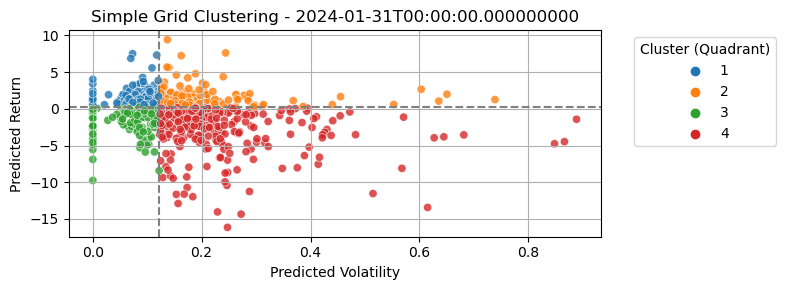

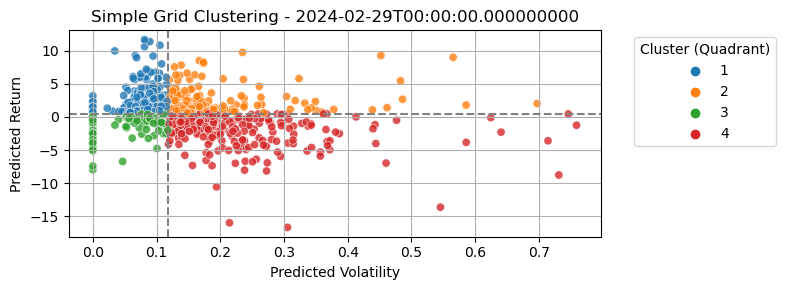

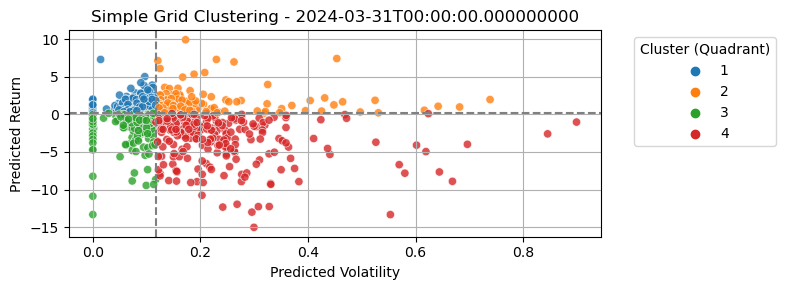

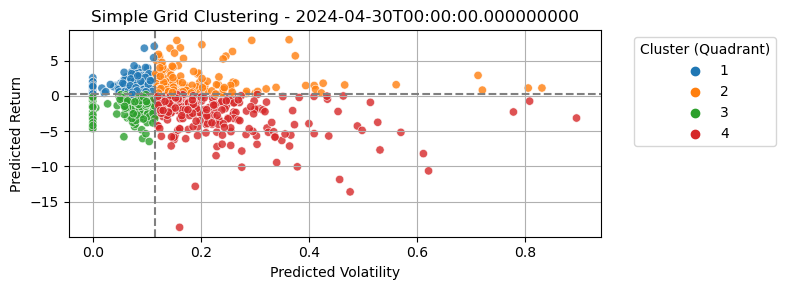

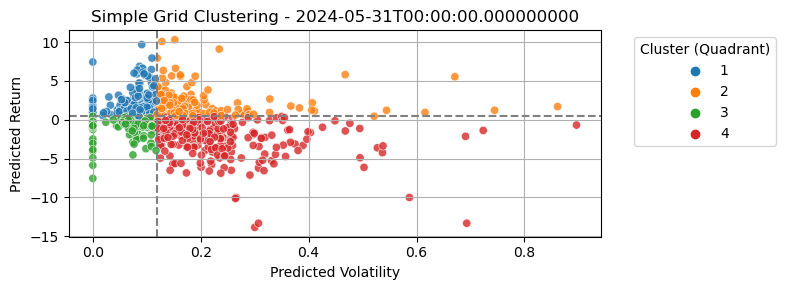

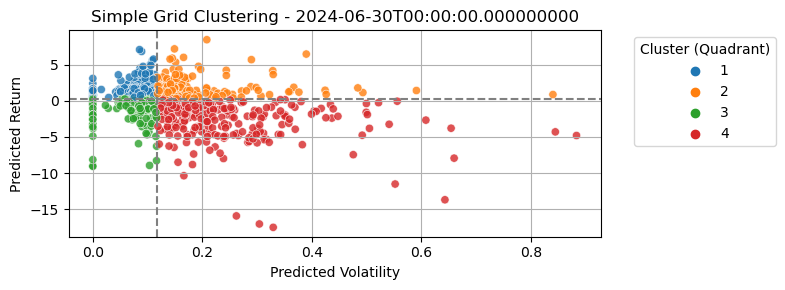

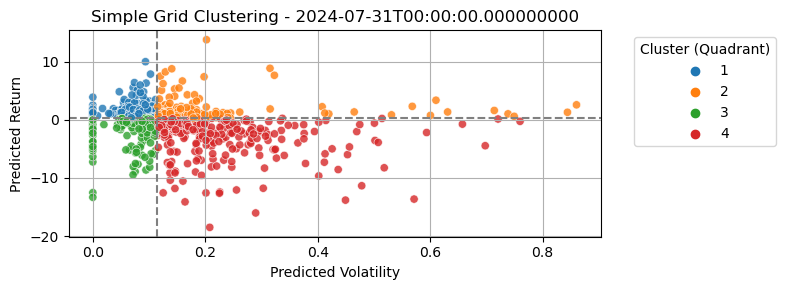

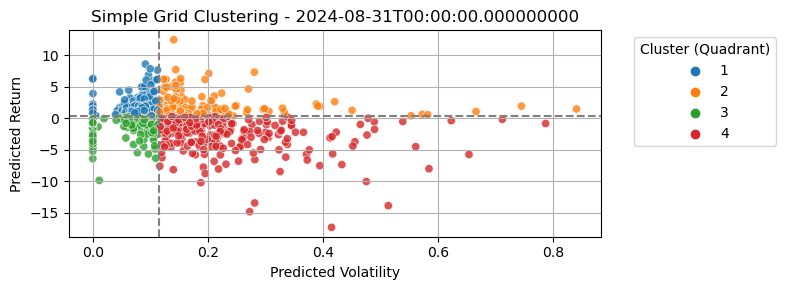

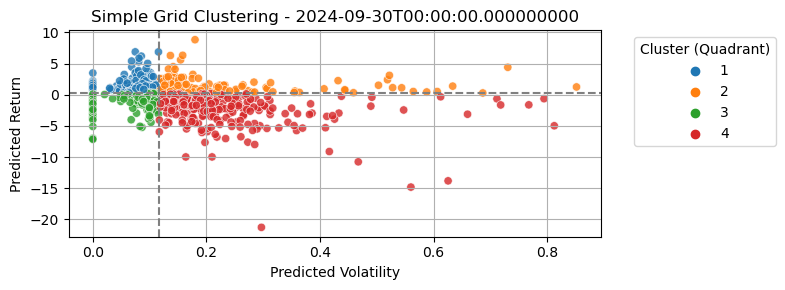

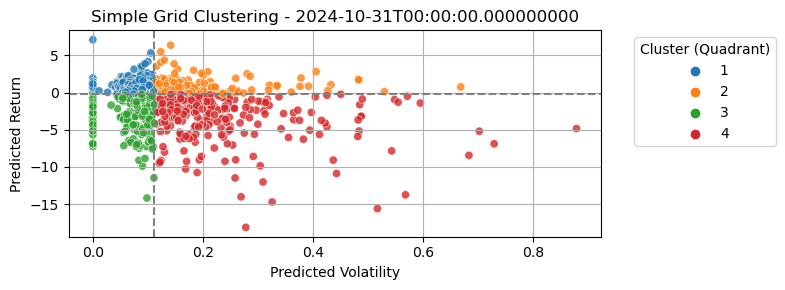

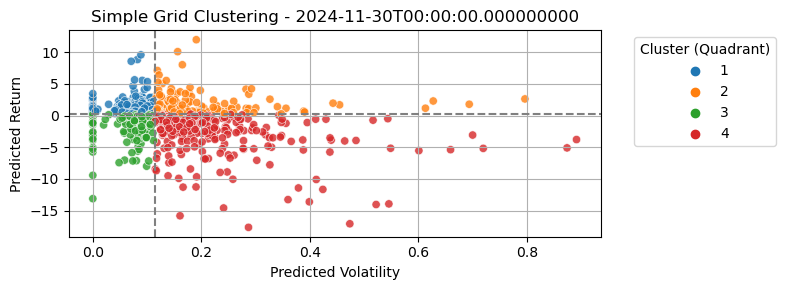

In [19]:
import seaborn as sns

subset_list = []

# Loop by mth
for month in sorted(enriched_df['Date'].unique()):
    subset = enriched_df[enriched_df['Date'] == month].copy()
    # outliers -------------
    subset = subset[
        (subset['PredictedVolatility'] > 0) &
        (subset['PredictedVolatility'] < 0.9)
    ].dropna(subset=['PredictedVolatility', 'PredictedReturn'])
    # use median splits
    vol_median = subset['PredictedVolatility'].median()
    ret_median = subset['PredictedReturn'].median()

    # order cluster label by defined positions
    def assign_quadrant(row):
        if row['PredictedVolatility'] < vol_median and row['PredictedReturn'] > ret_median:
            return 1  # top-left
        elif row['PredictedVolatility'] >= vol_median and row['PredictedReturn'] > ret_median:
            return 2  # top-right
        elif row['PredictedVolatility'] < vol_median and row['PredictedReturn'] <= ret_median:
            return 3  # bottom-left
        else:
            return 4  # bottom-right

    subset['Cluster'] = subset.apply(assign_quadrant, axis=1)

    # add to list
    subset_list.append(subset)

    # Plot
    plt.figure(figsize=(8, 3))
    sns.scatterplot(
        data=subset,
        x='PredictedVolatility',
        y='PredictedReturn',
        hue='Cluster',
        palette='tab10',
        alpha=0.8
    )

    # Add the necessary lines
    plt.axvline(x=vol_median, color='gray', linestyle='--')
    plt.axhline(y=ret_median, color='gray', linestyle='--')

    plt.title(f"Simple Grid Clustering - {month}")
    plt.xlabel("Predicted Volatility")
    plt.ylabel("Predicted Return")
    plt.grid(True)
    plt.legend(title='Cluster (Quadrant)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Combine all subsets into one df
enriched_df = pd.concat(subset_list, ignore_index=True)
clustered_df = enriched_df
# Optionally save it to a CSV
clustered_df.to_csv("clustered_df.csv", index=False)

In [20]:
clustered_df.head(10)

,Stock,Date,Model,ActualReturn,PredictedReturn,PredictedVolatility,Company Market Cap,Industry,Cluster
0,AAPL.O,2024-01-31,SVR,-1.999245,3.228082,8.009232e-02,3.210436e+12,Hi-Tech,1
1,NVDA.O,2024-01-31,SVR,25.138847,5.625397,1.398274e-01,2.968748e+12,Hi-Tech,2
2,MSFT.O,2024-01-31,SVR,3.959986,1.990512,6.507592e-01,2.888548e+12,Hi-Tech,2
3,AMZN.O,2024-01-31,SVR,13.007827,2.477833,5.700000e-11,2.097821e+12,Consumer,1
4,LLY,2024-01-31,SVR,15.477227,1.105123,6.553838e-02,7.713173e+11,Healthcare,1
5,WMT,2024-01-31,SVR,6.205914,-1.167518,5.029874e-02,6.842381e+11,Consumer,3
6,XOM,2024-01-31,SVR,1.649582,0.487940,7.584650e-02,4.855501e+11,Manufacturing,1
7,MA,2024-01-31,SVR,5.527441,2.426295,6.677547e-02,4.810539e+11,Other,1
8,UNH,2024-01-31,SVR,-3.609121,1.896739,5.885295e-02,4.469742e+11,Other,1
9,ORCL.K,2024-01-31,SVR,-0.017907,3.503782,8.713321e-02,4.185880e+11,Hi-Tech,1


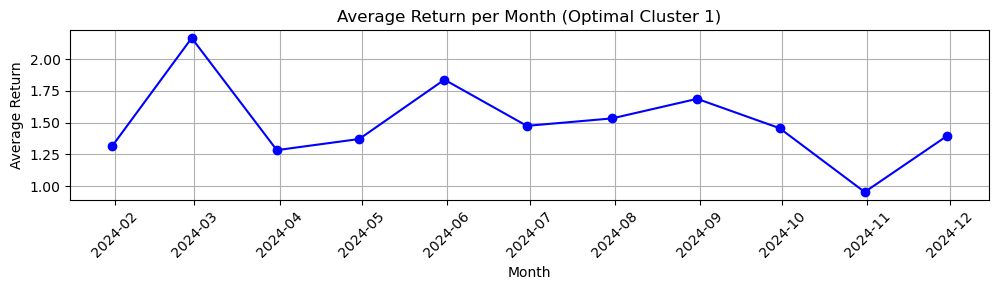

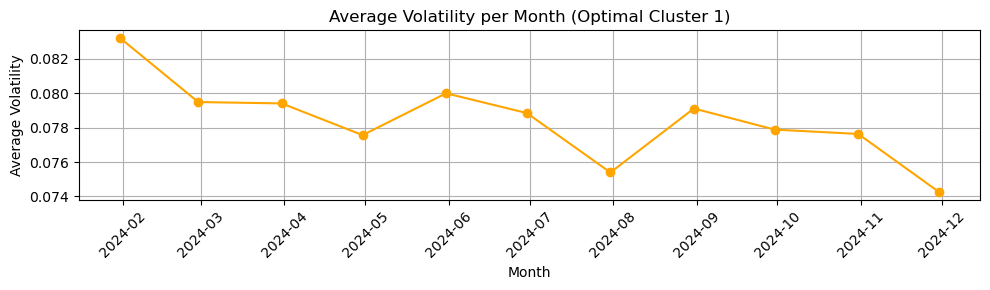

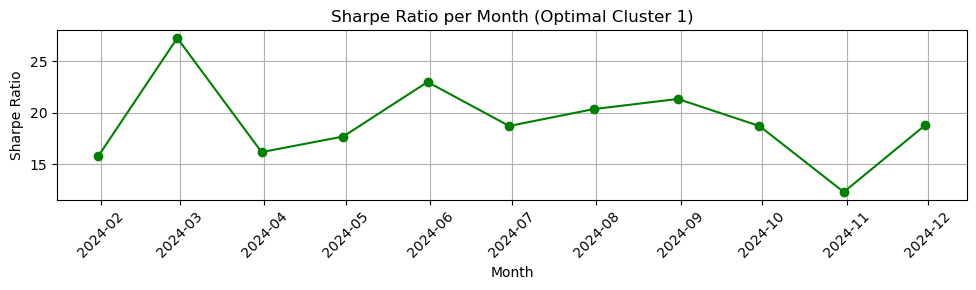

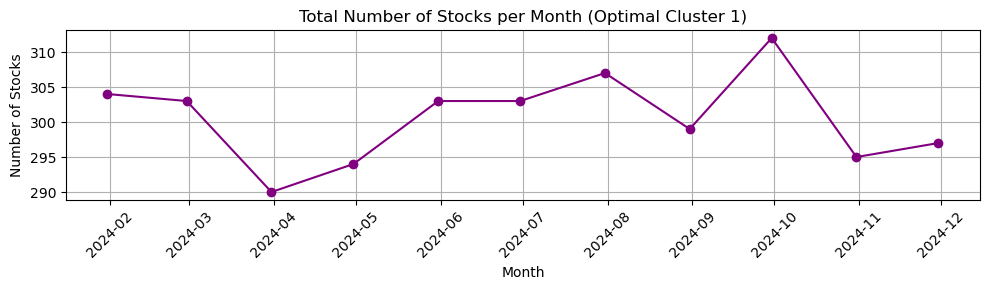

In [21]:
# Initialize lists for storing monthly statistics
months = sorted(clustered_df['Date'].unique())
sharpe_ratios = []
avg_volatilities = []
avg_returns = []
total_stocks = []

# Loop through each month and calculate statistics
for Date in months:
    subset = clustered_df[(clustered_df['Date'] == Date) & (clustered_df['Cluster'] == 1)]
    avg_ret = subset['PredictedReturn'].mean()
    avg_vol = subset['PredictedVolatility'].mean()
    sharpe_ratio = avg_ret / avg_vol if avg_vol != 0 else np.nan
    total_stock_count = len(subset)
    
    avg_returns.append(avg_ret)
    avg_volatilities.append(avg_vol)
    sharpe_ratios.append(sharpe_ratio)
    total_stocks.append(total_stock_count)

# Plot Average Return
plt.figure(figsize=(10, 3))
plt.plot(months, avg_returns, marker='o', color='blue')
plt.title('Average Return per Month (Optimal Cluster 1)')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Average Volatility
plt.figure(figsize=(10, 3))
plt.plot(months, avg_volatilities, marker='o', color='orange')
plt.title('Average Volatility per Month (Optimal Cluster 1)')
plt.xlabel('Month')
plt.ylabel('Average Volatility')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Sharpe Ratio
plt.figure(figsize=(10, 3))
plt.plot(months, sharpe_ratios, marker='o', color='green')
plt.title('Sharpe Ratio per Month (Optimal Cluster 1)')
plt.xlabel('Month')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot total number of stocks
plt.figure(figsize=(10, 3))
plt.plot(months, total_stocks, marker='o', color='purple')
plt.title('Total Number of Stocks per Month (Optimal Cluster 1)')
plt.xlabel('Month')
plt.ylabel('Number of Stocks')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()